In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
#Loading the dataset
df=pd.read_csv("Task 1 - Titanic Survival Prediction/titanic.csv")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# cleaning the dataset
#checking for null values
df.isnull().sum()
print("Sucessful")

#filling the missimg values
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Done successfully")

#encoding values
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
print("Succesfully encoded")

Sucessful
Done successfully
Succesfully encoded


In [6]:
#checking for null values
print(df.isnull().sum())
print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0       

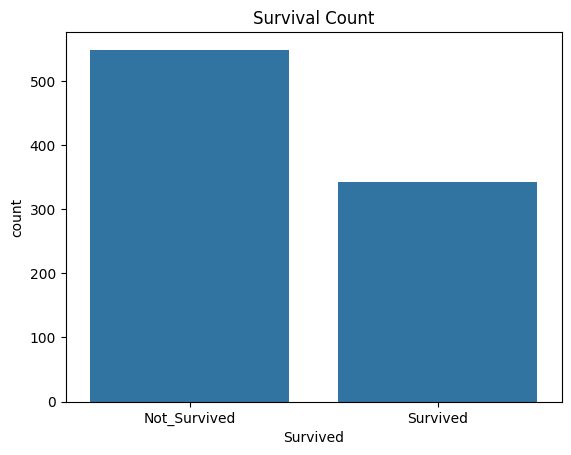

In [7]:
#Exploratory Data Analysis
#Survival Count
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.xticks([0,1],['Not_Survived','Survived'])
plt.show()

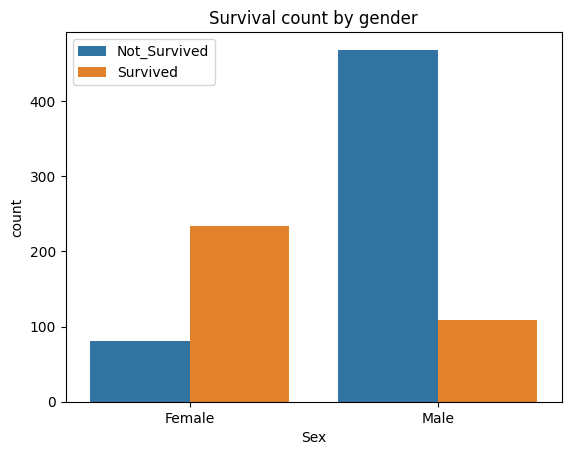

In [8]:
#Survival count by gender

sns.countplot(x='Sex', hue='Survived',data=df)
plt.title("Survival count by gender")
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['Not_Survived','Survived'])
plt.show()

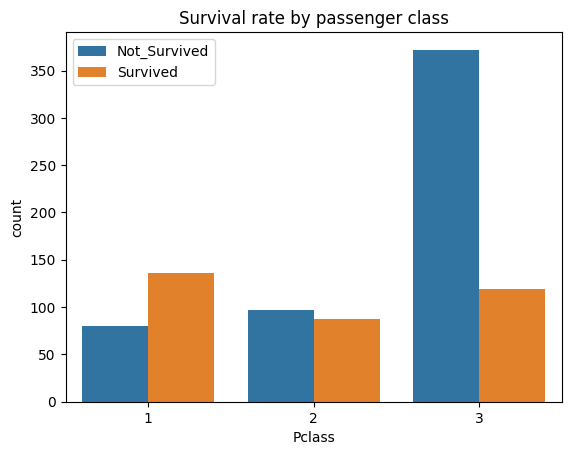

In [9]:
#Survival rate by passenger class
sns.countplot(x='Pclass' , hue='Survived', data=df)
plt.title("Survival rate by passenger class")
plt.legend(labels=['Not_Survived','Survived'])
plt.show()

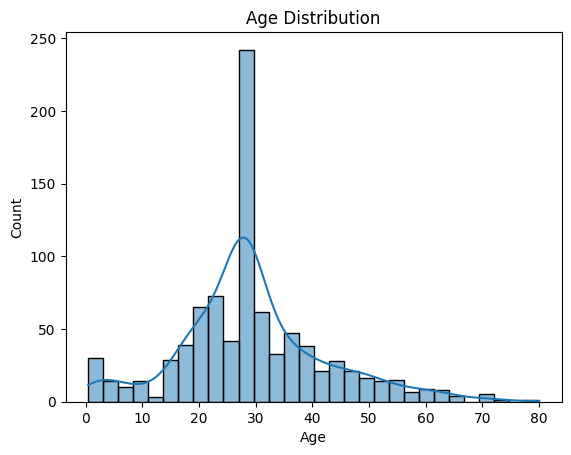

In [10]:
#Age distribution
sns.histplot(data=df,x='Age',bins=30,kde=True,)
plt.title("Age Distribution")
plt.show()

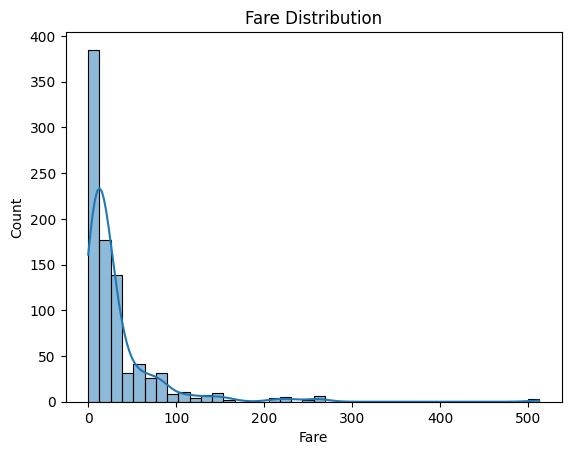

In [11]:
#Fare distribution
sns.histplot(data=df,x='Fare',bins=40,kde=True)
plt.title("Fare Distribution")
plt.show()

In [21]:
# model building
#initialising X and y values
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=df['Survived']
print("Sucessfull")

Sucessfull


In [22]:
#splitting training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Sucessful")

Sucessful


In [24]:
#Logistic Regression
#Initialise and trainig
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

#predicted value
y_pred=lr_model.predict(X_test)

#evaluation metrics
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:", confusion_matrix(y_test,y_pred))
print("Classification_Report:", classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877
Confusion_Matrix: [[90 15]
 [19 55]]
Classification_Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [25]:
#Random forest classifier
#initialising 
rf_model=RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train,y_train)

#Predicted value
y_pred=rf_model.predict(X_test)

#evaluation
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:", confusion_matrix(y_test,y_pred))
print("Classification_Report:", classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877
Confusion_Matrix: [[89 16]
 [18 56]]
Classification_Report:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [28]:
def predict_survival_user_input():
    print("Enter passenger details below 👇")

    # Collect inputs from user
    Pclass = int(input("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    
    Sex_input = input("Sex (male/female): ").strip().lower()
    Sex = 1 if Sex_input == 'male' else 0  # Convert to numeric

    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard: "))
    Parch = int(input("Number of parents/children aboard: "))
    Fare = float(input("Fare paid (e.g., 7.25): "))
    
    Embarked_input = input("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton): ").strip().upper()
    Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked_input]  # Convert to numeric

    # Make prediction
    input_data = pd.DataFrame(
    [[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]],
    columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
)

    prediction = rf_model.predict(input_data)

    print("\n🔍 Prediction:")
    print("Result:", "✅ Survived" if prediction[0] == 1 else "❌ Did NOT Survive")

# Call the function
predict_survival_user_input()


Enter passenger details below 👇


Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd):  1
Sex (male/female):  0
Age:  18
Number of siblings/spouses aboard:  3
Number of parents/children aboard:  3
Fare paid (e.g., 7.25):  7.35
Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):  Q



🔍 Prediction:
Result: ✅ Survived
